In [54]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline

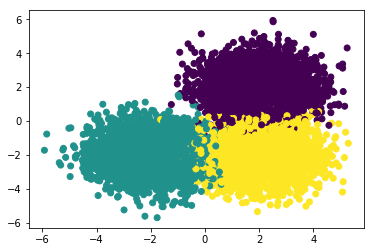

In [55]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

# The coordinates of the centers of our blobs.
centers = [[2, 2], [-2, -2], [2, -2]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

## K-Means

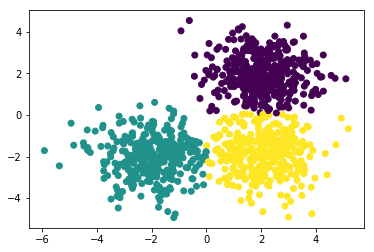

Comparing the assigned categories to the ones in the data: 

y_pred     0    1    2
y_train               
0        352    0   10
1          1  310    9
2          6    5  307

 ----------------------------------------------------------------------

 Column Accuracy List: [0.98050000000000004, 0.98409999999999997, 0.94169999999999998] 

Overall Accuracy: 0.969


In [56]:
# Calculate predicted values.
y_pred = KMeans(n_clusters=3, random_state=42).fit_predict(X_train)

# Plot the solution.
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing the assigned categories to the ones in the data: \n')
tab = pd.crosstab(y_train, y_pred)
tab.index.name = 'y_train'
tab.columns.name = 'y_pred'
print(tab)
print('\n', '-' * 70)
column_maxvals = [max(tab[column]) for column in tab.columns]
column_totals = [sum(tab[column]) for column in tab.columns]
column_accuracies = [round((column_maxvals[i] / column_totals[i]), 4) for i in range(0, len(column_maxvals))]
print('\n Column Accuracy List: {} \n'.format(column_accuracies))
print('Overall Accuracy: %.3f' % np.mean(column_accuracies))

## Mean Shift

In [57]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
y_pred = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(y_pred))

print("Number of estimated clusters: {}".format(n_clusters_))


Number of estimated clusters: 3


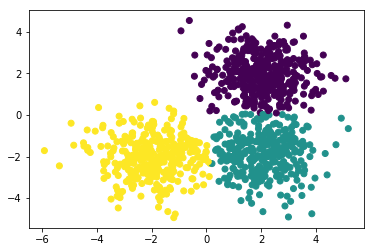

Comparing the assigned categories to the ones in the data: 

y_pred     0    1    2
y_train               
0        352   10    0
1          1    8  311
2          6  304    8

 ----------------------------------------------------------------------

 Column Accuracy List: [0.98050000000000004, 0.94410000000000005, 0.97489999999999999] 

Overall Accuracy: 0.967


In [58]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing the assigned categories to the ones in the data: \n')
tab = pd.crosstab(y_train, y_pred)
tab.index.name = 'y_train'
tab.columns.name = 'y_pred'
print(tab)
print('\n', '-' * 70)
column_maxvals = [max(tab[column]) for column in tab.columns]
column_totals = [sum(tab[column]) for column in tab.columns]
column_accuracies = [round((column_maxvals[i] / column_totals[i]), 4) for i in range(0, len(column_maxvals))]
print('\n Column Accuracy List: {} \n'.format(column_accuracies))
print('Overall Accuracy: %.3f' % np.mean(column_accuracies))

## Spectral Clustering

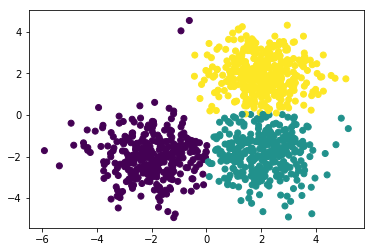

Comparing the assigned categories to the ones in the data: 

y_pred     0    1    2
y_train               
0          2   10  350
1        310    9    1
2          6  305    7

 ----------------------------------------------------------------------

 Column Accuracy List: [0.9748, 0.94140000000000001, 0.97770000000000001] 

Overall Accuracy: 0.965


In [59]:
from sklearn.cluster import SpectralClustering

# We know we're looking for three clusters.
n_clusters=3

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
y_pred=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing the assigned categories to the ones in the data: \n')
tab = pd.crosstab(y_train, y_pred)
tab.index.name = 'y_train'
tab.columns.name = 'y_pred'
print(tab)
print('\n', '-' * 70)
column_maxvals = [max(tab[column]) for column in tab.columns]
column_totals = [sum(tab[column]) for column in tab.columns]
column_accuracies = [round((column_maxvals[i] / column_totals[i]), 4) for i in range(0, len(column_maxvals))]
print('\n Column Accuracy List: {} \n'.format(column_accuracies))
print('Overall Accuracy: %.3f' % np.mean(column_accuracies))

## Affinity propagation

In [60]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

Done
Estimated number of clusters: 93


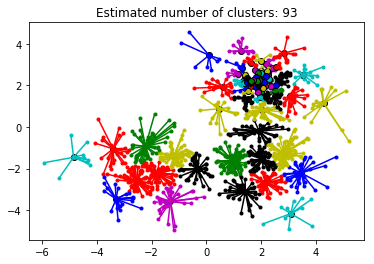

In [61]:
from itertools import cycle

plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)
plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

## Alternative Configurations
### Config 1
This configuration has five blobs, in 2-dimensional space, std same as before.

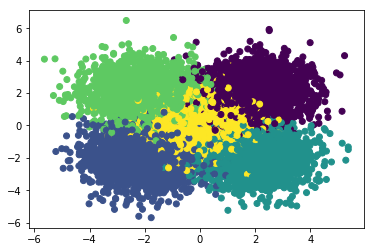

In [62]:
# The coordinates of the centers of our blobs.
centers = [[2, 2], [-2, -2], [2, -2], [-2, 2], [0,0]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

### K-Means - Config 1

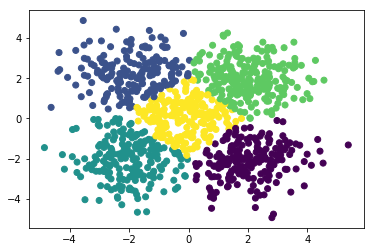

Comparing the assigned categories to the ones in the data: 

y_pred     0    1    2    3    4
y_train                         
0          1    5    0  202   13
1          4    2  181    0   16
2        175    0    3    2   11
3          0  164    3    6   14
4         12   11   12   16  147

 ----------------------------------------------------------------------

 Column Accuracy List: [0.91149999999999998, 0.90110000000000001, 0.90949999999999998, 0.89380000000000004, 0.73129999999999995] 

Overall Accuracy: 0.869


In [63]:
# Calculate predicted values.
y_pred = KMeans(n_clusters=5, random_state=42).fit_predict(X_train)

# Plot the solution.
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing the assigned categories to the ones in the data: \n')
tab = pd.crosstab(y_train, y_pred)
tab.index.name = 'y_train'
tab.columns.name = 'y_pred'
print(tab)
print('\n', '-' * 70)
column_maxvals = [max(tab[column]) for column in tab.columns]
column_totals = [sum(tab[column]) for column in tab.columns]
column_accuracies = [round((column_maxvals[i] / column_totals[i]), 4) for i in range(0, len(column_maxvals))]
print('\n Column Accuracy List: {} \n'.format(column_accuracies))
print('Overall Accuracy: %.3f' % np.mean(column_accuracies))

### Mean Shift - Config 1

In [64]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.1, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
y_pred = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(y_pred))

print("Number of estimated clusters: {}".format(n_clusters_))


Number of estimated clusters: 5


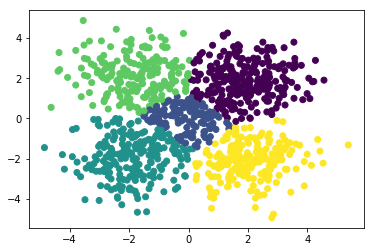

Comparing the assigned categories to the ones in the data: 

y_pred     0    1    2    3    4
y_train                         
0        211    3    0    6    1
1          0    5  192    2    4
2          3    7    6    0  175
3          6    6    4  171    0
4         36  105   22   22   13

 ----------------------------------------------------------------------

 Column Accuracy List: [0.82420000000000004, 0.83330000000000004, 0.85709999999999997, 0.85070000000000001, 0.90669999999999995] 

Overall Accuracy: 0.854


In [65]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing the assigned categories to the ones in the data: \n')
tab = pd.crosstab(y_train, y_pred)
tab.index.name = 'y_train'
tab.columns.name = 'y_pred'
print(tab)
print('\n', '-' * 70)
column_maxvals = [max(tab[column]) for column in tab.columns]
column_totals = [sum(tab[column]) for column in tab.columns]
column_accuracies = [round((column_maxvals[i] / column_totals[i]), 4) for i in range(0, len(column_maxvals))]
print('\n Column Accuracy List: {} \n'.format(column_accuracies))
print('Overall Accuracy: %.3f' % np.mean(column_accuracies))

### Spectral Clustering - Config 1

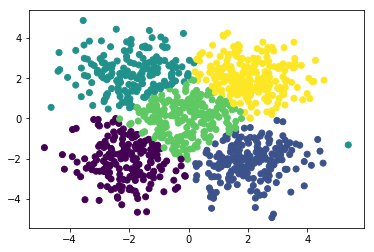

Comparing the assigned categories to the ones in the data: 

y_pred     0    1    2    3    4
y_train                         
0          0    1    6   15  199
1        172    4    2   25    0
2          2  173    1   13    2
3          3    0  164   15    5
4          7   11   11  158   11

 ----------------------------------------------------------------------

 Column Accuracy List: [0.93479999999999996, 0.9153, 0.89129999999999998, 0.69910000000000005, 0.91710000000000003] 

Overall Accuracy: 0.872


In [66]:
from sklearn.cluster import SpectralClustering

# We know we're looking for five clusters.
n_clusters=5

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
y_pred=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing the assigned categories to the ones in the data: \n')
tab = pd.crosstab(y_train, y_pred)
tab.index.name = 'y_train'
tab.columns.name = 'y_pred'
print(tab)
print('\n', '-' * 70)
column_maxvals = [max(tab[column]) for column in tab.columns]
column_totals = [sum(tab[column]) for column in tab.columns]
column_accuracies = [round((column_maxvals[i] / column_totals[i]), 4) for i in range(0, len(column_maxvals))]
print('\n Column Accuracy List: {} \n'.format(column_accuracies))
print('Overall Accuracy: %.3f' % np.mean(column_accuracies))

### Affinity Propagation- Config 1

In [67]:
# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

Done
Estimated number of clusters: 32


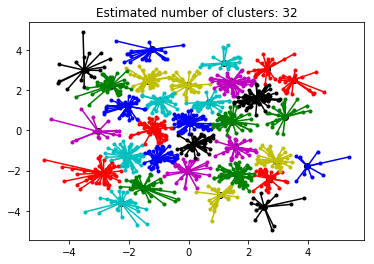

In [68]:
plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)
plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

### Config 2
This configuration has ten blobs, in 2-dimensional space, std same as before.

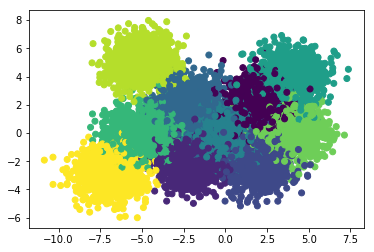

In [69]:
# The coordinates of the centers of our blobs.
centers = [[2, 2], [-2, -2], [2, -2], [-2, 2], [0,0], [4, 4], [-5, 0], [4, 0], [-5, 5], [-7, -3]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

### K-Means - Config 2

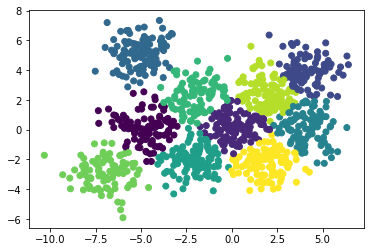

Comparing the assigned categories to the ones in the data: 

y_pred    0   1   2    3   4   5   6   7   8   9
y_train                                         
0         0  10   4    0  12   0   1   0  85   0
1         5   6   0    0   0  94   0   0   0   4
2         0   6   0    0   6   1   0   0   0  88
3         4  11   0    1   0   4  82   0   0   0
4         1  67   0    0   2   8   2   0   2   6
5         0   0  88    0   1   0   0   0  14   0
6        91   0   0    0   0   1   4   3   0   0
7         0   2   2    0  76   0   0   0   4   4
8         0   0   0  107   0   0   3   0   0   0
9         1   0   0    0   0   0   0  87   0   0

 ----------------------------------------------------------------------

 Column Accuracy List: [0.89219999999999999, 0.65690000000000004, 0.93620000000000003, 0.99070000000000003, 0.78349999999999997, 0.87039999999999995, 0.89129999999999998, 0.9667, 0.8095, 0.86270000000000002] 

Overall Accuracy: 0.866


In [70]:
# Calculate predicted values.
y_pred = KMeans(n_clusters=10, random_state=42).fit_predict(X_train)

# Plot the solution.
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing the assigned categories to the ones in the data: \n')
tab = pd.crosstab(y_train, y_pred)
tab.index.name = 'y_train'
tab.columns.name = 'y_pred'
print(tab)
print('\n', '-' * 70)
column_maxvals = [max(tab[column]) for column in tab.columns]
column_totals = [sum(tab[column]) for column in tab.columns]
column_accuracies = [round((column_maxvals[i] / column_totals[i]), 4) for i in range(0, len(column_maxvals))]
print('\n Column Accuracy List: {} \n'.format(column_accuracies))
print('Overall Accuracy: %.3f' % np.mean(column_accuracies))

### Mean Shift - Config 2

In [71]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.06, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
y_pred = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(y_pred))

print("Number of estimated clusters: {}".format(n_clusters_))


Number of estimated clusters: 10


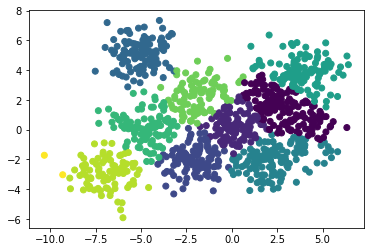

Comparing the assigned categories to the ones in the data: 

y_pred    0   1   2    3   4   5   6   7   8  9
y_train                                        
0        86  11   0    0   0  12   0   3   0  0
1         0   3  96    0   4   0   6   0   0  0
2         1   5   1    0  94   0   0   0   0  0
3         0   9   4    2   0   0   5  82   0  0
4         6  65   8    0   6   0   1   2   0  0
5         6   0   0    0   0  96   0   1   0  0
6         0   0   1    0   0   0  91   4   3  0
7        58   2   0    0  24   4   0   0   0  0
8         0   0   0  107   0   0   0   3   0  0
9         0   0   0    0   0   0   1   0  85  2

 ----------------------------------------------------------------------

 Column Accuracy List: [0.54779999999999995, 0.68420000000000003, 0.87270000000000003, 0.98170000000000002, 0.73440000000000005, 0.85709999999999997, 0.875, 0.86319999999999997, 0.96589999999999998, 1.0] 

Overall Accuracy: 0.838


In [72]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing the assigned categories to the ones in the data: \n')
tab = pd.crosstab(y_train, y_pred)
tab.index.name = 'y_train'
tab.columns.name = 'y_pred'
print(tab)
print('\n', '-' * 70)
column_maxvals = [max(tab[column]) for column in tab.columns]
column_totals = [sum(tab[column]) for column in tab.columns]
column_accuracies = [round((column_maxvals[i] / column_totals[i]), 4) for i in range(0, len(column_maxvals))]
print('\n Column Accuracy List: {} \n'.format(column_accuracies))
print('Overall Accuracy: %.3f' % np.mean(column_accuracies))

### Spectral Clustering - Config 2

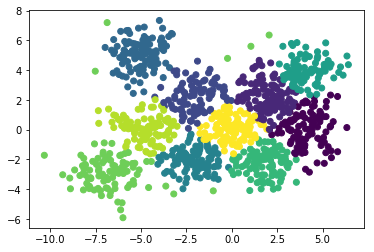

Comparing the assigned categories to the ones in the data: 

y_pred    0   1   2    3   4   5   6   7   8   9
y_train                                         
0         9  93   1    0   0   5   0   0   0   4
1         0   0   0    0  89   0   4   4   4   8
2         9   0   0    0   1   0  86   0   0   5
3         0   0  84    2   2   0   0   1   2  11
4         2   5   2    0   6   0   6   0   1  66
5         3  13   0    0   0  85   0   2   0   0
6         0   0   5    1   1   0   0   4  88   0
7        77   6   0    0   0   1   2   0   0   2
8         0   0   3  105   0   0   0   2   0   0
9         0   0   0    0   0   0   0  87   1   0

 ----------------------------------------------------------------------

 Column Accuracy List: [0.77000000000000002, 0.79490000000000005, 0.88419999999999999, 0.97219999999999995, 0.89900000000000002, 0.93410000000000004, 0.87760000000000005, 0.87, 0.91669999999999996, 0.6875] 

Overall Accuracy: 0.861


In [73]:
from sklearn.cluster import SpectralClustering

# We know we're looking for ten clusters.
n_clusters=10

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
y_pred=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing the assigned categories to the ones in the data: \n')
tab = pd.crosstab(y_train, y_pred)
tab.index.name = 'y_train'
tab.columns.name = 'y_pred'
print(tab)
print('\n', '-' * 70)
column_maxvals = [max(tab[column]) for column in tab.columns]
column_totals = [sum(tab[column]) for column in tab.columns]
column_accuracies = [round((column_maxvals[i] / column_totals[i]), 4) for i in range(0, len(column_maxvals))]
print('\n Column Accuracy List: {} \n'.format(column_accuracies))
print('Overall Accuracy: %.3f' % np.mean(column_accuracies))

### Affinity Propagation- Config 2

In [74]:
# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

Done
Estimated number of clusters: 28


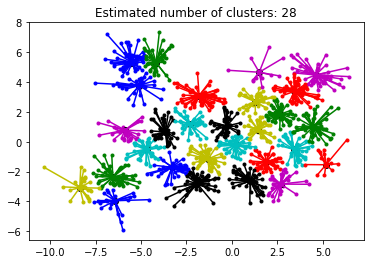

In [75]:
plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)
plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

### Config 3
This configuration has five blobs, in 2-dimensional space, std same as before. The configuration is the same as configuration 1. But closer together.

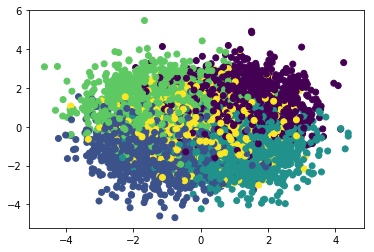

In [76]:
# The coordinates of the centers of our blobs.
centers = [[1, 1], [-1, -1], [1, -1], [-1, 1], [0,0]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

### K-Means - Config 3

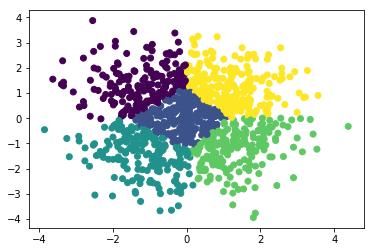

Comparing the assigned categories to the ones in the data: 

y_pred     0   1    2    3    4
y_train                        
0         21  32    2   19  147
1         17  50  117   18    1
2          2  27   22  129   11
3        111  37    9    2   28
4         31  85   23   23   36

 ----------------------------------------------------------------------

 Column Accuracy List: [0.6099, 0.36799999999999999, 0.67630000000000001, 0.6754, 0.65920000000000001] 

Overall Accuracy: 0.598


In [77]:
# Calculate predicted values.
y_pred = KMeans(n_clusters=5, random_state=42).fit_predict(X_train)

# Plot the solution.
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing the assigned categories to the ones in the data: \n')
tab = pd.crosstab(y_train, y_pred)
tab.index.name = 'y_train'
tab.columns.name = 'y_pred'
print(tab)
print('\n', '-' * 70)
column_maxvals = [max(tab[column]) for column in tab.columns]
column_totals = [sum(tab[column]) for column in tab.columns]
column_accuracies = [round((column_maxvals[i] / column_totals[i]), 4) for i in range(0, len(column_maxvals))]
print('\n Column Accuracy List: {} \n'.format(column_accuracies))
print('Overall Accuracy: %.3f' % np.mean(column_accuracies))

### Mean Shift - Config 3

In [78]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.07, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
y_pred = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(y_pred))

print("Number of estimated clusters: {}".format(n_clusters_))


Number of estimated clusters: 5


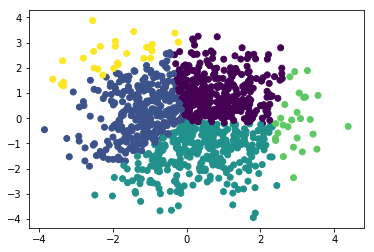

Comparing the assigned categories to the ones in the data: 

y_pred     0    1    2   3   4
y_train                       
0        167   21   21  11   1
1          9   96   97   0   1
2         25   11  141  14   0
3         48  109    7   0  23
4         70   71   53   2   2

 ----------------------------------------------------------------------

 Column Accuracy List: [0.52349999999999997, 0.35389999999999999, 0.442, 0.51849999999999996, 0.85189999999999999] 

Overall Accuracy: 0.538


In [79]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing the assigned categories to the ones in the data: \n')
tab = pd.crosstab(y_train, y_pred)
tab.index.name = 'y_train'
tab.columns.name = 'y_pred'
print(tab)
print('\n', '-' * 70)
column_maxvals = [max(tab[column]) for column in tab.columns]
column_totals = [sum(tab[column]) for column in tab.columns]
column_accuracies = [round((column_maxvals[i] / column_totals[i]), 4) for i in range(0, len(column_maxvals))]
print('\n Column Accuracy List: {} \n'.format(column_accuracies))
print('Overall Accuracy: %.3f' % np.mean(column_accuracies))

### Spectral Clustering - Config 3

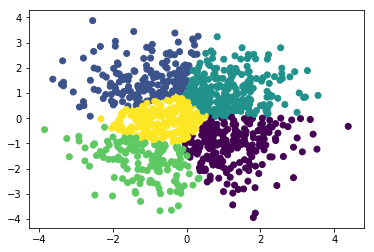

Comparing the assigned categories to the ones in the data: 

y_pred     0    1    2   3   4
y_train                       
0         25   26  155   1  14
1         27   13    1  96  66
2        140    2   15  20  14
3          3  110   25   5  44
4         33   25   54  17  69

 ----------------------------------------------------------------------

 Column Accuracy List: [0.61399999999999999, 0.625, 0.62, 0.69059999999999999, 0.33329999999999999] 

Overall Accuracy: 0.577


In [80]:
from sklearn.cluster import SpectralClustering

# We know we're looking for five clusters.
n_clusters=5

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
y_pred=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing the assigned categories to the ones in the data: \n')
tab = pd.crosstab(y_train, y_pred)
tab.index.name = 'y_train'
tab.columns.name = 'y_pred'
print(tab)
print('\n', '-' * 70)
column_maxvals = [max(tab[column]) for column in tab.columns]
column_totals = [sum(tab[column]) for column in tab.columns]
column_accuracies = [round((column_maxvals[i] / column_totals[i]), 4) for i in range(0, len(column_maxvals))]
print('\n Column Accuracy List: {} \n'.format(column_accuracies))
print('Overall Accuracy: %.3f' % np.mean(column_accuracies))

### Affinity Propagation- Config 3

In [81]:
# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

Done
Estimated number of clusters: 107


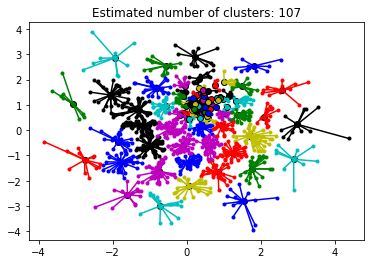

In [82]:
plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)
plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

## Conclusions
From the above, we can conclude:
- k-Means and Spectral Clustering give very similar results for a wide variety of situations.
- Moving cluster centers closer together, or adding more centers within the same volume, reduces accuracy, for any of the models.
- The Mean Shift method gives the most flexibility as the 'quantile' parameter' can be varied in order to yield the desired number of clusters.
- An alternative view of Mean Shift is that one should have an idea in advance as to the number of clusters present in the data, as the model will only divide the data according to the quantile value entered by the user.
- Although all of the models lose accuracy when the number of centers is increased (within a given volume), the accuracy of the Mean Shift model tends to suffer more than that of the k-Means or Spectral Clustering methods.